<a href="https://colab.research.google.com/github/Arish005/sentimental-analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/Arish005/sentimental-analysis.git
%cd sentimental-analysis

fatal: destination path 'sentimental-analysis' already exists and is not an empty directory.
/content/sentimental-analysis/sentimental-analysis


In [ ]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import praw
import pandas as pd
from praw.models import MoreComments

In [ ]:
reddit_read_only = praw.Reddit(client_id="VsloxM7GHRIM4-8Y3p5qGw",
							client_secret="02DNv5HA5W_oKtmj-dC3mMi1hG6jiA",
							user_agent="bana_sh",
              check_for_async=False)

In [ ]:
subreddit = reddit_read_only.subreddit("ChatGPT")

for post in subreddit.top(limit=0):
	print(post.title)
	print()

In [ ]:
posts = subreddit.top("year")
# Scraping the top posts of the current year

posts_dict = {"Title": [], "Post Text": [],
			"ID": [], "Score": [],
			"Total Comments": [], "Post URL": []
			}

for post in posts:
	# Title of each post
	posts_dict["Title"].append(post.title)

	# Text inside a post
	posts_dict["Post Text"].append(post.selftext)

	# Unique ID of each post
	posts_dict["ID"].append(post.id)

	# The score of a post
	posts_dict["Score"].append(post.score)

	# Total number of comments inside the post
	posts_dict["Total Comments"].append(post.num_comments)

	# URL of each post
	posts_dict["Post URL"].append(post.url)

# Saving the data in a pandas dataframe
top_posts = pd.DataFrame(posts_dict)
top_posts

<ipython-input-6-148a24640db0>:1: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  posts = subreddit.top("year")


,Title,Post Text,ID,Score,Total Comments,Post URL
0,Turned ChatGPT into the ultimate bro,,144lfc1,65761,1124,https://i.redd.it/81rl4zdt1v4b1.png
1,Photoshop AI Generative Fill was used for its ...,,13wfaqg,51256,1327,https://www.reddit.com/gallery/13wfaqg
2,"Bing ChatGPT too proud to admit mistake, doubl...",The guy typing out these responses for Bing mu...,14gnv5b,50200,2260,https://www.reddit.com/gallery/14gnv5b
3,Was curious if GPT-4 could recognize text art,,12cobqr,43287,662,https://i.redd.it/1g6v045f53sa1.png
4,Unfiltered ChatGPT opinion about Reddit,,12ed85v,39276,1509,https://i.redd.it/vdd5irelzesa1.png
...,...,...,...,...,...,...
95,"Create the most German image ever, then make i...",,1861gjd,13064,1511,https://www.reddit.com/gallery/1861gjd
96,I feel so scammed,,15oasp0,13000,379,https://i.redd.it/14658j1vthhb1.jpg
97,Let's drink for legends and AI,,14m2qpq,12889,253,https://v.redd.it/1la4je2t1y8b1
98,I was not even done trying to trick ChatGPT,,14nq615,12866,318,https://i.redd.it/a2dug2qgib9b1.jpg


In [ ]:
import pandas as pd

top_posts.to_csv("Top Posts.csv", index=True)

In [ ]:
import praw
import pandas as pd

reddit_read_only = praw.Reddit(client_id="VsloxM7GHRIM4-8Y3p5qGw",		 # your client id
							client_secret="02DNv5HA5W_oKtmj-dC3mMi1hG6jiA",	 # your client secret
							user_agent="bana_sh",
              check_for_async=False)

url = "https://www.reddit.com/r/ChatGPT/comments/12b7bos/i_will_never_forgive_myself_for_falling_for_this/"

submission = reddit_read_only.submission(url=url)

In [ ]:
from praw.models import MoreComments

post_comments = []

for comment in submission.comments:
	if type(comment) == MoreComments:
		continue

	post_comments.append(comment.body)

comments_df = pd.DataFrame(post_comments, columns=['comment'])
comments_df


,comment
0,We kindly ask /u/KaiWood11 to respond to this ...
1,First person to get got by an ai
2,Ok GPT is smater than ONE human at least
3,Here's my attempt using an edited version of D...
4,That was ridiculously good.
...,...
198,This is awesome
199,Oh fuck it talked itself out of the AI box
200,Dang he led you right into that one
201,"It tricked you, that’s freaking hilarious. 😂"


In [ ]:
comments_df.to_csv('chatgpt.csv')

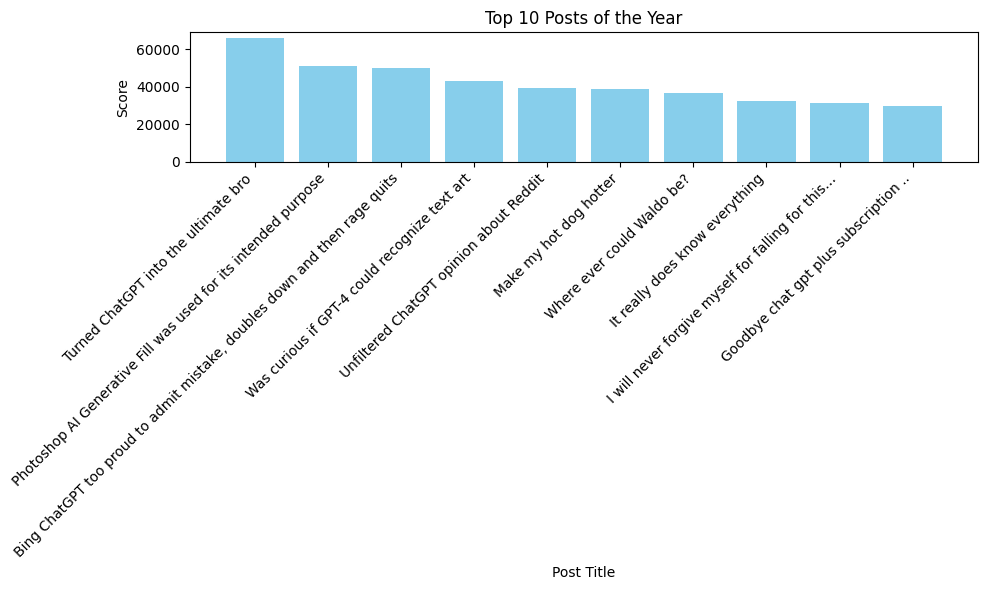

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'top_posts' dataframe
# If not, you can uncomment the below code and run it.
# posts_dict = {"Title": [], "Post Text": [],
#               "ID": [], "Score": [],
#               "Total Comments": [], "Post URL": []
#               }
#
# top_posts = pd.DataFrame(posts_dict)

# Assuming you have 'top_posts' dataframe, continue with the plotting
plt.figure(figsize=(10, 6))

# Sort the dataframe based on the 'Score' column
top_posts_sorted = top_posts.sort_values(by='Score', ascending=False)

# Plotting a bar graph
plt.bar(top_posts_sorted['Title'][:10], top_posts_sorted['Score'][:10], color='skyblue')
plt.xlabel('Post Title')
plt.ylabel('Score')
plt.title('Top 10 Posts of the Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


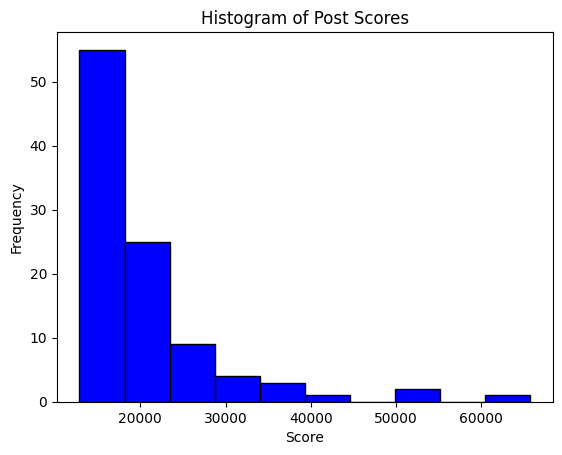

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a histogram for the 'Score' column
plt.hist(top_posts['Score'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
pip install nltk


In [ ]:
import nltk

nltk.download('nrc_lexicon')
